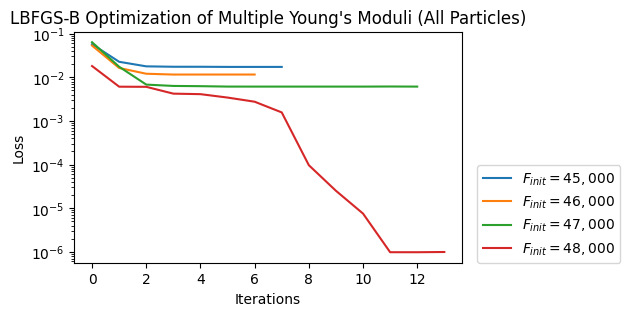

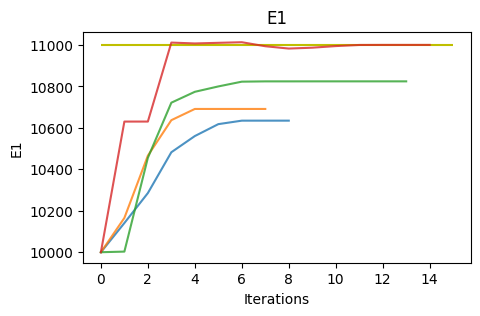

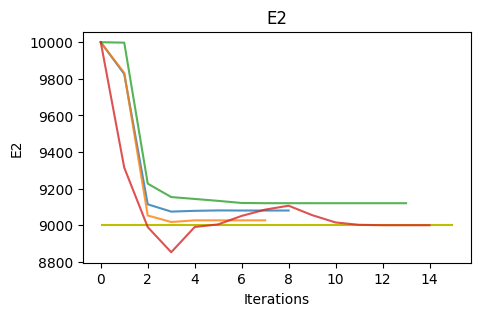

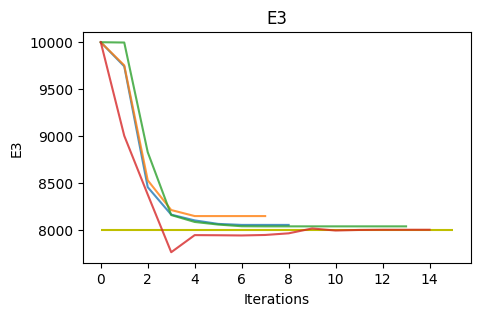

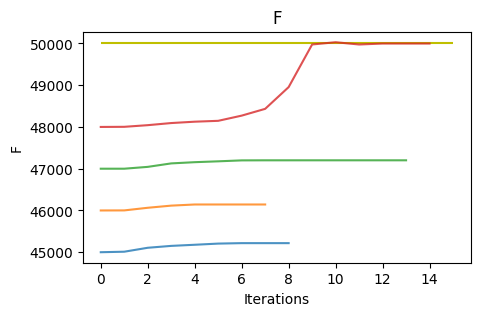

In [4]:
import matplotlib.pyplot as plt
import json
import numpy as np

with open('result_full_f45.json') as json_file:
    result_full_f45 = json.load(json_file)
with open('result_full_f48.json') as json_file:
    result_full_f48 = json.load(json_file)
with open('result_full_f46.json') as json_file:
    result_full_f46 = json.load(json_file)
with open('result_full_f47.json') as json_file:
    result_full_f47 = json.load(json_file)



keys = ["E1", "E2", "E3", "F"]
Es = [1.1e4, 0.9e4, 0.8e4, 5e4]
results = [result_full_f45, result_full_f46, result_full_f47, result_full_f48]
scale = [1, 1, 1, 1]
labels = ['$F_{init}=45,000$',
          '$F_{init}=46,000$',
          '$F_{init}=47,000$',
          '$F_{init}=48,000$']
plt.figure(figsize=(5,3))
plt.title("LBFGS-B Optimization of Multiple Young's Moduli (All Particles)")
plt.ylabel("Loss")
plt.xlabel("Iterations")
for j, result in enumerate(results):
    plt.plot(np.array(result["losses"]) * scale[j], label=labels[j])
plt.legend(loc=(1.04,0))
plt.yscale('log')
plt.show()


for i, key in enumerate(keys):
    plt.figure(figsize=(5,3))
    plt.title(key)
    plt.ylabel(key)
    plt.xlabel("Iterations")
    plt.hlines(Es[i], 0, 15, color='y', label='True Value')
    for j, result in enumerate(results):
        plt.plot(result[key], alpha=0.8, label=labels[j])
    # plt.legend()
    plt.show()


In [2]:
import matplotlib.pyplot as plt
import json

with open('result_full_block.json') as json_file:
    result_full_e_f = json.load(json_file)

len(result_full_e_f['losses'])


it_hist = result_full_e_f['it_hist']
n_ef_it = len(result_full_e_f['it_hist']) / 2

block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
block_index[0] += 1
block_index[1] += 1

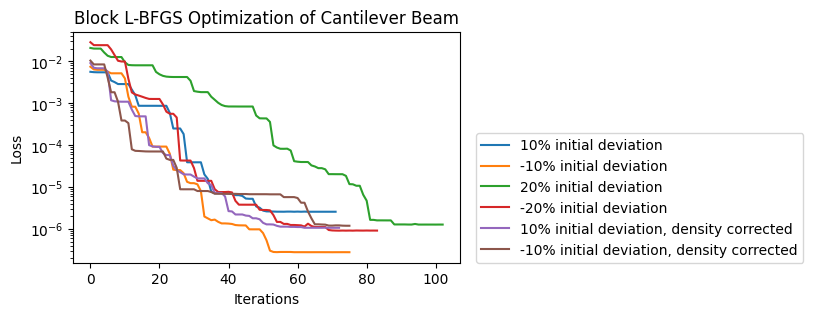

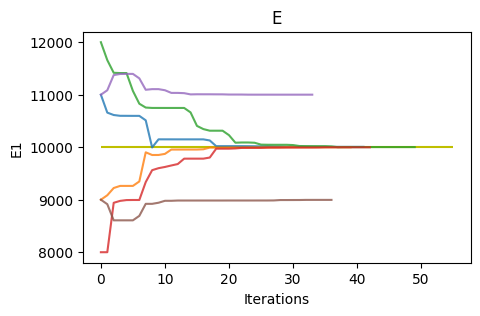

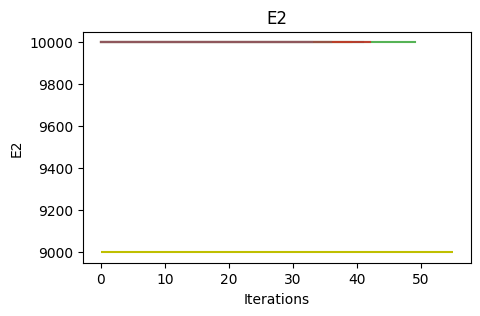

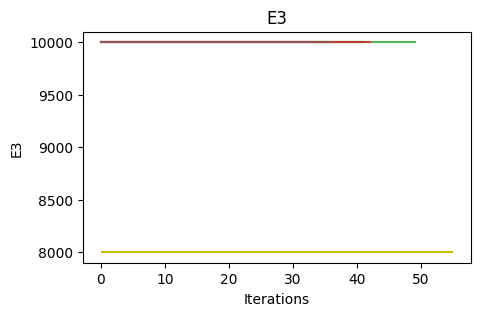

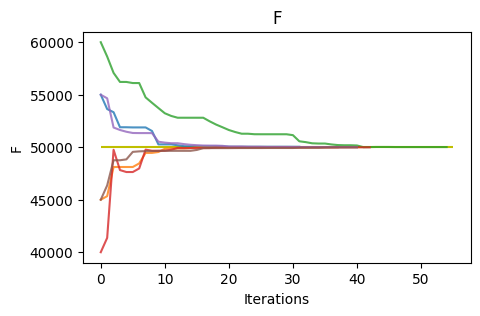

In [5]:
import matplotlib.pyplot as plt
import json
import numpy as np

filenames = [
    'result_full_block_10p.json',
    'result_full_block_-10p.json',
    'result_full_block_20p.json',
    'result_full_block_-20p.json',
    'result_full_block_10p_densitycorrection.json',
    'result_full_block_-10p_densitycorrection.json'
]
results = []
for name in filenames:

    with open(name) as json_file:
        result = json.load(json_file)
        results.append(result)




keys = ["E1", "E2", "E3", "F"]
Es = [1e4, 0.9e4, 0.8e4, 5e4]
scale = [1, 1, 1, 1, 1, 1, 1]
labels = ['10% initial deviation',
          '-10% initial deviation', 
          '20% initial deviation',
          '-20% initial deviation',
          '10% initial deviation, density corrected',
          '-10% initial deviation, density corrected']
colors = []
plt.figure(figsize=(5,3))
plt.title("Block L-BFGS Optimization of Cantilever Beam")
plt.ylabel("Loss")
plt.xlabel("Iterations")
for j, result in enumerate(results):
    plt.plot(np.array(result["losses"]) * scale[j], label=labels[j])
    for n_it in result['it_hist']:
        block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
        block_index[0] += 0
        block_index[1] += 0
        # plt.vlines(block_index[:-1], 1e-0, 1e-10, linestyle="dashed")
plt.legend(loc=(1.04,0))
plt.yscale('log')
plt.show()


for i, key in enumerate(keys):
    plt.figure(figsize=(5,3))
    plt.title(key)
    if i==0:
        plt.title('E')
    plt.ylabel(key)
    plt.xlabel("Iterations")
    plt.hlines(Es[i], 0, 55, color='y', label='True Value')
    for j, result in enumerate(results):
        plt.plot(result[key], alpha=0.8, label=labels[j])
        block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
        block_index[0] += 1
        block_index[1] += 1
        # plt.vlines(block_index[:-1], Es[i]*0.8, Es[i]*1.2, linestyle="dashed")
    # plt.legend(loc=(1.04,0))
    plt.show()


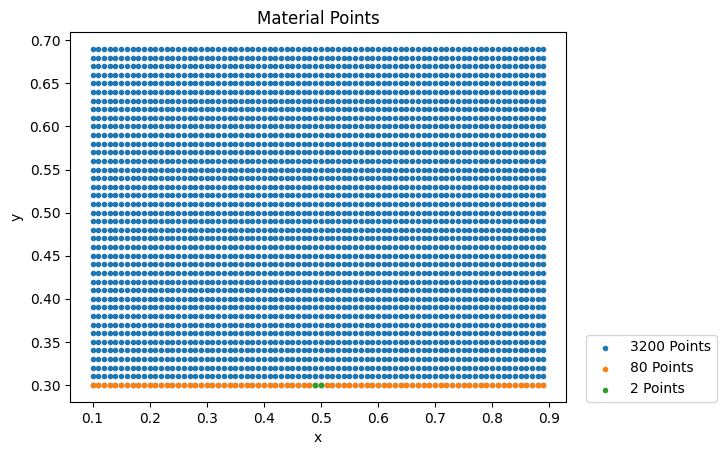

In [4]:
x = np.load('x_f.npy')[0]
plt.scatter(x[:,0], x[:,1], marker='.', label='3200 Points')
plt.scatter(x[:80,0], x[:80,1], marker='.', label='80 Points')
plt.scatter(x[39:41,0], x[39:41,1], marker='.', label='2 Points')
plt.legend(loc=(1.04,0))
plt.title('Material Points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()